<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Basis Statistiek / SQL </h1>

<h2>Imports<h2>

In [1]:
import os
os.environ['export PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] ='notebook'
os.environ['PYARROW_IGNORE_TIMEZONE'] = '1'

In [2]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
from PIL import Image
from pyspark import SparkContext as sc
from pyspark.sql import SparkSession
import pandas as pd
import pyspark.pandas as ps
import sqlite3

<h2>Extract, Transform and Load</h2>

<h3>Extract</h3>

In [3]:
# https://raw.githubusercontent.com/ajturner/acetate/master/places/Countries-Europe.csv
eurCsvFile = "../csv/countries_europe.csv"
euCsvFile = "../csv/european_union.csv"

 # Create Pandas DataFrames
eurDF = pd.read_csv(eurCsvFile)
euDF = pd.read_csv(euCsvFile)
print(eurDF)
# print(euDF)

    zoom                    name  abbreviation Code  ISO numeric  \
0      3                 Ukraine          Ukr.  UKR          804   
1      3                  France           Fr.  FRA          250   
2      3                   Spain         Spain  ESP          724   
3      3                  Sweden          Swe.  SWE          752   
4      3                 Germany          Ger.  DEU          276   
5      3                 Finland          Fin.  FIN          246   
6      3                  Norway          Nor.  NOR          578   
7      3                  Poland          Pol.  POL          616   
8      3                   Italy         Italy  ITA          380   
9      3          United Kingdom          U.K.  GBR          826   
10     3                 Romania          Rom.  ROU          642   
11     3                 Belarus         Bela.  BLR          112   
12     3                  Greece          Grc.  GRC          300   
13     3                Bulgaria          Blg.  

<h3>Transform</h3>

<h3>Exercise 1</h3>
<h4>Gegeven</h4>

In [4]:
benelux = {"Belgium", "The Netherlands", "Luxembourg"}
nordics = {"Denmark", "Finland", "Iceland", "Norway"} #Zweden hoort blijkbaar niet bij?
baltics = {"Estonia", "Latvia", "Lithuania"}

<h4>Gevraagd</h4>
<ol>
    <li>Voeg de kolom <u>group</u> toe aan de dataset <u>eurDF</u> met daarin de groep waartoe een land behoort volgens bovenstaande sets</li>
    <li>Ga na of er nog meer landengroepen zijn binnen Europa en voeg die ook toe</li>
    <li>Sla deze verrijkte dataset op in een nieuw CSV bestand</li>
</ol>

<h4>Oplossing</h4>

In [5]:
# Oplossing
import numpy as np
#maken van extra kolom
eurDF['vereniging']=''

for land in benelux:
    eurDF.loc[eurDF['name']==land,'vereniging']= 'benelux'
for land in nordics:
    eurDF.loc[eurDF['name']==land,'vereniging']= 'nordics'
for land in baltics:
    eurDF.loc[eurDF['name']==land,'vereniging']= 'baltics'

print(eurDF)



#print(eurDF.keys())
#eurDF.name =='Belgium'.index(True)
#regionstr in ['benelux','nordics','baltics']:
#    regmem= eval(a) 
    

    zoom                    name  abbreviation Code  ISO numeric  \
0      3                 Ukraine          Ukr.  UKR          804   
1      3                  France           Fr.  FRA          250   
2      3                   Spain         Spain  ESP          724   
3      3                  Sweden          Swe.  SWE          752   
4      3                 Germany          Ger.  DEU          276   
5      3                 Finland          Fin.  FIN          246   
6      3                  Norway          Nor.  NOR          578   
7      3                  Poland          Pol.  POL          616   
8      3                   Italy         Italy  ITA          380   
9      3          United Kingdom          U.K.  GBR          826   
10     3                 Romania          Rom.  ROU          642   
11     3                 Belarus         Bela.  BLR          112   
12     3                  Greece          Grc.  GRC          300   
13     3                Bulgaria          Blg.  

In [6]:
#eurDF

<h2>SQLite</h2>

<h3>Load</h3>

<p>Maak een lege database</p>

In [7]:
#onderstaande regel hoeft niet.
#!sqlite3 ../db/europe.db "VACUUM;"

In [8]:
# Connect to SQLite database
dbConnection = sqlite3.connect('../db/europe.db')

<p>Maak tabellen o.b.v. de dataset</p>

In [9]:
eurDF.to_sql('countries', dbConnection, if_exists='replace', index = False)
euDF.to_sql('eu', dbConnection, if_exists='replace', index = False)
#Twee databases toegevoegd aan db bestand. 

27

In [ ]:
os.path.exists('../db/europe.db')

True

In [10]:
dbCursor = dbConnection.cursor()

query = """
    SELECT *
    FROM countries
    INNER JOIN eu
    ON countries.Code = eu.Code
    LIMIT 10
"""

result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[(3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', '', 'FRA', 'France', '1958-01-01'), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', '', 'ESP', 'Spain', '1986-01-01'), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', '', 'SWE', 'Sweden', '1995-01-01'), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', '', 'DEU', 'Germany', '1958-01-01'), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'nordics', 'FIN', 'Finland', '1995-01-01'), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', '', 'POL', 'Poland', '2004-05-01'), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', '', 'ITA', 'Italy', '1958-01-01'), (3, 'Romania', 'Rom.', 'ROU', 642, 237500.0, 21959278, 46.0, 25.0, 'eu', '', 'ROU', 'Romania', '2007-01-01'), (3, 'Greece', 'Grc.', 'GRC', 300, 131940.0, 11000000, 39.0, 22.0, 'eu', '', 'GRC', 'Greece', '1981-01-01'), (3, 'Bulgaria', 'B

In [11]:
print(eurDF['Code'])
len(result)
for res in result:print(res[1])

0     UKR
1     FRA
2     ESP
3     SWE
4     DEU
5     FIN
6     NOR
7     POL
8     ITA
9     GBR
10    ROU
11    BLR
12    GRC
13    BGR
14    ISL
15    PRT
16    CZE
17    DNK
18    HUN
19    SRB
20    AUT
21    IRL
22    LTU
23    LVA
24    HRV
25    BIH
26    SVK
27    EST
28    NLD
29    CHE
30    MDA
31    BEL
32    ALB
33    MKD
34    SVN
35    MNE
36    CYP
37    LUX
38    FRO
39    AND
40    MLT
41    LIE
42    GGY
43    SMR
44    GIB
45    MCO
46    VAT
Name: Code, dtype: object
France
Spain
Sweden
Germany
Finland
Poland
Italy
Romania
Greece
Bulgaria


In [12]:
# 
countriesQuery = """
    SELECT *
    FROM countries
    LIMIT 10
"""

In [ ]:
result = dbCursor.execute(countriesQuery).fetchall()
print(result)

[(3, 'Ukraine', 'Ukr.', 'UKR', 804, 603700.0, 45415596, 49.0, 32.0, 'eu', ''), (3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', ''), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', ''), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', ''), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', ''), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'nordics'), (3, 'Norway', 'Nor.', 'NOR', 578, 324220.0, 4907000, 62.0, 10.0, 'eu', 'nordics'), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', ''), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', ''), (3, 'United Kingdom', 'U.K.', 'GBR', 826, 244820.0, 62348447, 54.9, -3.12, 'eu', '')]


<h2>Afhankelijke en onafhankelijke variabelen</h2>

<h3>Overlappende uitkomsten</h3>

In [13]:
eu = {"Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "The Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"}

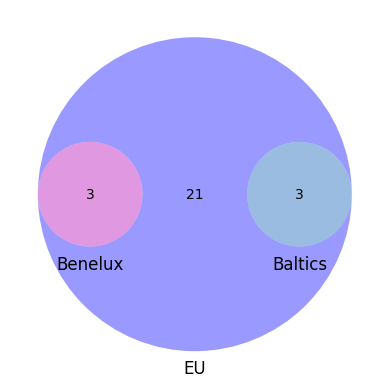

In [14]:
venn3([benelux, baltics, eu], ('Benelux', 'Baltics', 'EU'))

<h3>Exercise 2</h3>
<p>
    Gebruik SQL queries voor het verkrijgen van
<ol>
    <li>P(Nordics); de kans dat een land onderdeel is van de Nordics</li>
    <li><u>P(EU)</u>; de kans dat een Europees land lid is van de Europese Unie</li>
    <li><u>P(EU and Nordics)</u>; de kans dat een land onderdeel is van de Norics en lid is van de EU</li>
</ol>
</p>

SQL spielerei

In [15]:

query = """
    SELECT *
    FROM countries as c
    WHERE c = 1
"""

query = """
    SELECT vereniging
    FROM countries as c
    WHERE c.Code > 10
"""
#hieronder sql commando om de beschikbare tabellen in de db op te halen
#  
query = """
SELECT name FROM sqlite_master WHERE type='table';
"""
result = dbCursor.execute(query).fetchall()
print('beschikbare tabellen')
print(result)

#
print('info oekraine')
query = """
SELECT * FROM countries WHERE name = 'Ukraine';
"""
result = dbCursor.execute(query).fetchall()
print(result)

#
print('beschikbare kolommen in een tabel')
query = """
SELECT sql FROM sqlite_master
WHERE tbl_name = 'countries' AND type = 'table'
"""
result = dbCursor.execute(query).fetchall()
print(result)

query = """
SELECT c.Code FROM countries as c
WHERE vereniging='baltics'
"""
result = dbCursor.execute(query).fetchall()
print(result)



beschikbare tabellen
[('countries',), ('eu',)]
info oekraine
[(3, 'Ukraine', 'Ukr.', 'UKR', 804, 603700.0, 45415596, 49.0, 32.0, 'eu', '')]
beschikbare kolommen in een tabel
[('CREATE TABLE "countries" (\n"zoom" INTEGER,\n  "name" TEXT,\n  "abbreviation" TEXT,\n  "Code" TEXT,\n  "ISO numeric" INTEGER,\n  "land area km" REAL,\n  "population" INTEGER,\n  "latitude" REAL,\n  "longitude" REAL,\n  "continent" TEXT,\n  "vereniging" TEXT\n)',)]
[('LTU',), ('LVA',), ('EST',)]


 <li>P(Nordics); de kans dat een land onderdeel is van de Nordics</li>

In [16]:
query = """
SELECT c.Code FROM countries as c
WHERE vereniging='baltics'
"""
result_nord = dbCursor.execute(query).fetchall()
print(len(result))

query = """
SELECT * FROM countries 
"""
result_all = dbCursor.execute(query).fetchall()
print(len(result_all))


print((100*len(result)/len(result_all)))
Pnordics= print(f'chance of nordic {round(100*len(result)/len(result_all),2)}%')

3
47
6.382978723404255
chance of nordic 6.38%


<li><u>P(EU)</u>; de kans dat een Europees land lid is van de Europese Unie</li>

In [42]:
query = """
    SELECT *
    FROM countries as c
    INNER JOIN eu
    ON c.Code = eu.Code
    WHERE c.continent = 'eu'
"""
resulteu = dbCursor.execute(query).fetchall()
print(resulteu)
print(len(resulteu))

query = """
    SELECT *
    FROM countries as c
"""
result_all = dbCursor.execute(query).fetchall()


Pcineu= print(f'chance of european country is part of the EU {round(100*len(resulteu)/len(result_all),2)}%')

[(3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', '', 'FRA', 'France', '1958-01-01'), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', '', 'ESP', 'Spain', '1986-01-01'), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', '', 'SWE', 'Sweden', '1995-01-01'), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', '', 'DEU', 'Germany', '1958-01-01'), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'nordics', 'FIN', 'Finland', '1995-01-01'), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', '', 'POL', 'Poland', '2004-05-01'), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', '', 'ITA', 'Italy', '1958-01-01'), (3, 'Romania', 'Rom.', 'ROU', 642, 237500.0, 21959278, 46.0, 25.0, 'eu', '', 'ROU', 'Romania', '2007-01-01'), (3, 'Greece', 'Grc.', 'GRC', 300, 131940.0, 11000000, 39.0, 22.0, 'eu', '', 'GRC', 'Greece', '1981-01-01'), (3, 'Bulgaria', 'B

Nog Meer Spielerei

In [19]:
# Oplossing
query = """
    SELECT *
    FROM countries
    INNER JOIN eu
    ON countries.Code = eu.Code
"""
result = dbCursor.execute(query).fetchall()
print(result)
print(len(result))

query = """
    SELECT *
    FROM eu
"""
result = dbCursor.execute(query).fetchall()
print(result)
print(len(result))

query = """
    SELECT *
    FROM countries
"""
result = dbCursor.execute(query).fetchall()
#print(result)
print(len(result))

query = """
    SELECT *
    FROM countries
    WHERE continent != 'eu'

"""
result = dbCursor.execute(query).fetchall()
print(result)
print(len(result))


[(3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', '', 'FRA', 'France', '1958-01-01'), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', '', 'ESP', 'Spain', '1986-01-01'), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', '', 'SWE', 'Sweden', '1995-01-01'), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', '', 'DEU', 'Germany', '1958-01-01'), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'nordics', 'FIN', 'Finland', '1995-01-01'), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', '', 'POL', 'Poland', '2004-05-01'), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', '', 'ITA', 'Italy', '1958-01-01'), (3, 'Romania', 'Rom.', 'ROU', 642, 237500.0, 21959278, 46.0, 25.0, 'eu', '', 'ROU', 'Romania', '2007-01-01'), (3, 'Greece', 'Grc.', 'GRC', 300, 131940.0, 11000000, 39.0, 22.0, 'eu', '', 'GRC', 'Greece', '1981-01-01'), (3, 'Bulgaria', 'B

<li><u>P(EU and Nordics)</u>; de kans dat een land onderdeel is van de Norics en lid is van de EU</li>

In [53]:

query = """
    SELECT countries.Code
    FROM countries
    INNER JOIN eu
    ON countries.Code = eu.Code
    WHERE vereniging = 'nordics'
"""

resultnord = dbCursor.execute(query).fetchall()
print(resultnord)
print(len(resultnord))

query = """
    SELECT *
    FROM eu
"""
resulteu = dbCursor.execute(query).fetchall()
print(resulteu)
print(len(resulteu))
Pcineu= print(f'chance of EU country being part of both EU and nordics {round(100*len(resultnord)/len(result_all),2)}%')

[('FIN',), ('DNK',)]
2
[('AUT', 'Austria', '1995-01-01'), ('BEL', 'Belgium', '1958-01-01'), ('BGR', 'Bulgaria', '2007-01-01'), ('HRV', 'Croatia', '2013-07-01'), ('CYP', 'Cyprus', '2004-05-01'), ('CZE', 'Czechia', '2004-05-01'), ('DNK', 'Denmark', '1973-01-01'), ('EST', 'Estonia', '2004-05-01'), ('FIN', 'Finland', '1995-01-01'), ('FRA', 'France', '1958-01-01'), ('DEU', 'Germany', '1958-01-01'), ('GRC', 'Greece', '1981-01-01'), ('HUN', 'Hungary', '2004-05-01'), ('IRL', 'Ireland', '1973-01-01'), ('ITA', 'Italy', '1958-01-01'), ('LVA', 'Latvia', '2004-05-01'), ('LTU', 'Lithuania', '2004-05-01'), ('LUX', 'Luxembourg', '1958-01-01'), ('MLT', 'Malta', '2004-05-01'), ('NLD', 'Netherlands', '1958-01-01'), ('POL', 'Poland', '2004-05-01'), ('PRT', 'Portugal', '1986-01-01'), ('ROU', 'Romania', '2007-01-01'), ('SVK', 'Slovakia', '2004-05-01'), ('SVN', 'Slovenia', '2004-05-01'), ('ESP', 'Spain', '1986-01-01'), ('SWE', 'Sweden', '1995-01-01')]
27
chance of EU country being part of both EU and nordics

Extraatje

In [63]:
print('beschikbare kolommen in een tabel')
query = """
SELECT sql FROM sqlite_master
WHERE tbl_name = 'eu' AND type = 'table'
"""

result = dbCursor.execute(query).fetchall()
print(result)
print(len(result))


query = """
    ALTER TABLE eu
    RENAME 'Member-Since' to 'MEMBERSINCE'
"""
result = dbCursor.execute(query).fetchall()
print(result)
print(len(result))




beschikbare kolommen in een tabel
[('CREATE TABLE "eu" (\n"Code" TEXT,\n  "Name" TEXT,\n  "MEMBERSINCE" TEXT\n)',)]
1


OperationalError: no such column: "Member-Since"

In [72]:
query = """
DROP  VIEW v3
""" 
result = dbCursor.execute(query).fetchall()
print(result)
print(len(result))

query = """
CREATE VIEW v3(Name,Code)
as 
SELECT Name,Code
FROM countries
""" 
result = dbCursor.execute(query).fetchall()
print(result)
print(len(result))



[]
0
[]
0


In [ ]:
# Close connection to SQLite database
dbConnection.close()